#import
Importanto o .dat do drive \\
path: /content/drive/My Drive/UFRGS/2020 1/Astrofísica B/1.0Msun-Z0.00001.dat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.style as style 
style.available
style.use("seaborn-dark")
style.use('seaborn-poster')

data = pd.read_csv("/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/1.0Msun-Z0.00001.dat", sep=r"  +", engine='python')    #Lendo o .dat com o pandas

DF=pd.DataFrame(data)   #Transformando .dat em DataFrame


DF.head()
DF_test= DF             #Variável de testes
#DF_test.min()






In [ ]:
#Início da MainSeq
min = 1e-10                                   #"Cap" para os valores muito pequenos, tudo abaixo disso será considerado = 0 
min_mass = 10e-3                              #Valor da massa mínima 
#Fim da MainSeq / Hcen = 0
mainseq = DF.drop(DF[DF["Hcen"] < min].index) #Retirando todos os valores de Hcen > min(approx 0) para a variável mainseq
index_ms = mainseq.index[-1]                  #Pegando o último indice de mainseq


FHe = np.log10(6103.5460) #Idade do Flash de He em milhões de anos  


#Gigante Vermelha / Fusão de He
DF2 = DF[index_ms:]                                   #Iniciando DF2 a partir do final da mainseq
RGB = DF2.drop(DF2[DF2["Hecen"] < min].index)         #Retirando os valores de Hecen > min(approx 0) para a variável RGB
index_RGB = RGB.index[-1]                             #Pegando o último indice de RGB
RGV = RGB.drop(RGB[RGB["log(age/Myr)"] > FHe].index)  #Tirando os valores depois do Flash 
index_RGV = RGV.index[-1]                             #Pegando o último indice de RGV
#RGV


#Ramo Horizontal
"""Inicia no Flash de He e termina quando Hecen = zero"""
FRH = np.log10(6180.8400)             #Fim do He central e fim do Ramo Horizontal 


DF3 = DF2[index_RGV:]
RH = DF3.drop(DF3[DF3["log(age/Myr)"] > FRH].index)
index_RH = RH.index[-1]
#RH.tail()
#print(index_RH)






#Ramo Assintótico
FTP = np.log10(6192.3923)              #Idade do último Pulso Térmico, no caso, fim do RA
DF4 = DF3[index_RH:]
RA = DF4.drop(DF4[DF4["log(age/Myr)"] > FTP].index)   #Retirando os dados com idade maior que a do último Pulso Térmico
index_RA = RA.index[-1]
print(index_RA)
RA.tail()
#Nebulosa Planetária
"""Colocar ponto em FTP"""



"""
b = PRA["Log Teff"].idxmax()
b1= PRA["Log Teff"].max()
print(b1)
print(10**(b1))
PRA.loc[b:b+1]
c = PRA.loc[PRA["Log Teff"]==b1, ["log(age/Myr)"]]
print(c)
c["log(age/Myr)"]"""



#Pós-Ramo Assintótico "PRA"
DF5 = DF4.loc[index_RA:]
DF5
FPRA = DF5.loc[DF5["Log Teff"]==DF5["Log Teff"].max(), ["log(age/Myr)"]] #Achando o pico da T_Eff = Inicio da WD e fim do PRA
FPRA
DF5.index[0]

#PRA1 = DF4.drop(DF4[DF4["log(age/Myr)"] < FTP].index)
PRA = DF5.loc[DF5.index[0]: FPRA.index[0]]#DF5.drop(DF5[DF5["log(age/Myr)"] > FPRA].index)    #Tirando os dados mais velhos que o Inicio da Anã Branca (Fim do Pós-Ramo Assintótico)
#index_PRA = PRA.index[-1]
PRA
index_PRA = PRA.index[-1]
index_PRA


#Anã Branca + Curva de Resfriamento 
DF6 = DF5.loc[index_PRA:]
DF6
WD = DF6#.drop(DF4[DF4["log(age/Myr)"] < FTP].index)
WD
DF6
#Procurando TEff = 30kK
h = np.log10(30000)
h
Neb = PRA.loc[PRA["Log Teff"] > h]
n = Neb.index[0]
n

#index_NP = NP.index[-1]

#NP.head()

#Curva de Resfriamento / Anã Branca














#mp.scatter(DF_test["Log Teff"], DF_test["Log L"], s=0.001, label="blue", c='red')
#mp.gca().invert_xaxis()
#mp.legend(loc="best")
#mp.scatter(DF_test["Hecen"], DF_test["log(age/Myr)"],s=1, label='')
#mp.scatter(DF_test["C12cen"], DF_test["log(age/Myr)"],s=1,label='')
#mp.scatter(DF_test["O16cen"], DF_test["log(age/Myr)"],s=1,label='')


79551


83492

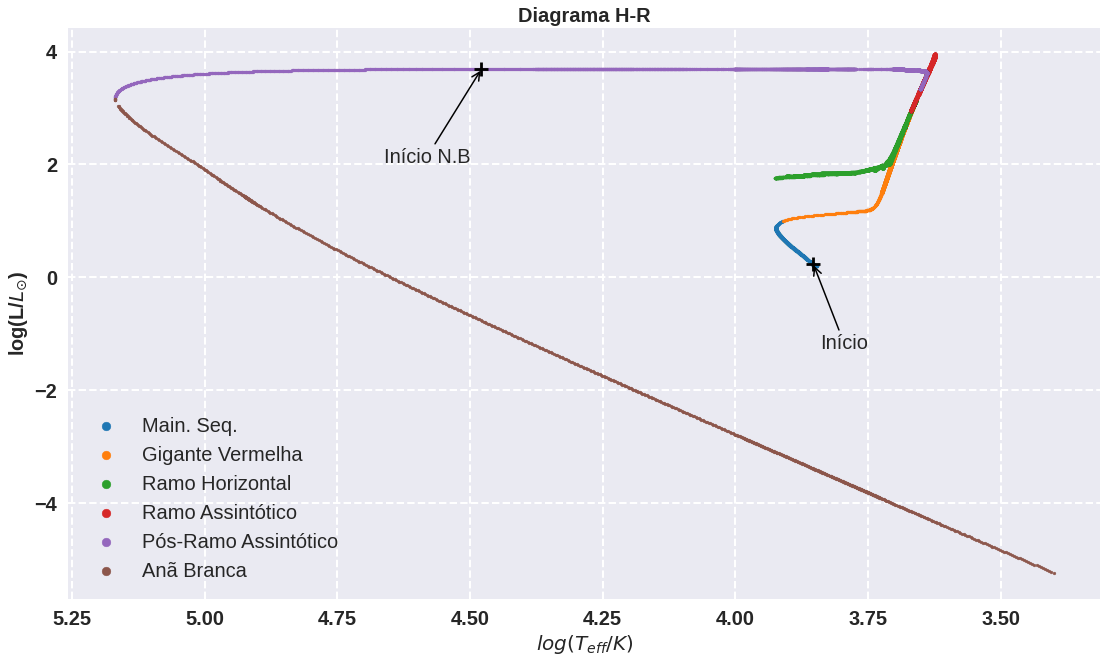

In [ ]:

#Diagrama H-R [DADOS]
mp.scatter(mainseq["Log Teff"],mainseq["Log L"], s=30, marker=".", label="Main. Seq.")
mp.scatter(RGV["Log Teff"],RGV["Log L"], s=30, marker=".", label="Gigante Vermelha")
mp.scatter(RH["Log Teff"],RH["Log L"], s=30, marker=".", label="Ramo Horizontal")
mp.scatter(RA["Log Teff"],RA["Log L"], s=30, marker=".", label="Ramo Assintótico")
mp.scatter(PRA["Log Teff"],PRA["Log L"], s=30, marker=".", label="Pós-Ramo Assintótico")
mp.scatter(WD["Log Teff"],WD["Log L"], s=30, marker=".",  label="Anã Branca")
mp.scatter(DF["Log Teff"][0],DF["Log L"][0], s=200, marker="+", c="k")
mp.scatter(PRA["Log Teff"][n],PRA["Log L"][n], s=200, marker="+", c="k")


#Anotação do "Início"
mp.annotate('Início', xy=(DF["Log Teff"][0], DF["Log L"][0]),  xycoords='data',
            xytext=(3.75, -1),size=20,
            arrowprops=dict(facecolor='black',arrowstyle="->", connectionstyle='arc3', linewidth=1.5),
            horizontalalignment='right', verticalalignment='top')
#Anotação do "Nebulosa Planetária"
mp.annotate('Início N.B', xy=(PRA["Log Teff"][n], PRA["Log L"][n]),  xycoords='data',
            xytext=(4.5, 2.3),size=20,
            arrowprops=dict(facecolor='black',arrowstyle="->", connectionstyle='arc3', linewidth=1.5),
            horizontalalignment='right', verticalalignment='top')


#Configurações para o Plot HR:
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
lgnd.legendHandles[2]._sizes = [300]
lgnd.legendHandles[3]._sizes = [300]
lgnd.legendHandles[4]._sizes = [300]
lgnd.legendHandles[5]._sizes = [300]
#lgnd.legendHandles[6]._sizes = [300]
#lgnd.legendHandles[7]._sizes = [300]
mp.gca().invert_xaxis()
mp.title("Diagrama H-R", fontweight='bold', fontsize=20)
mp.xlabel("$log(T_{eff}/K)$", fontweight='bold', fontsize=20)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("log(L/$L_{\odot}$)", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/MainSeq.pdf', format='png', dpi=1200)
mp.show()














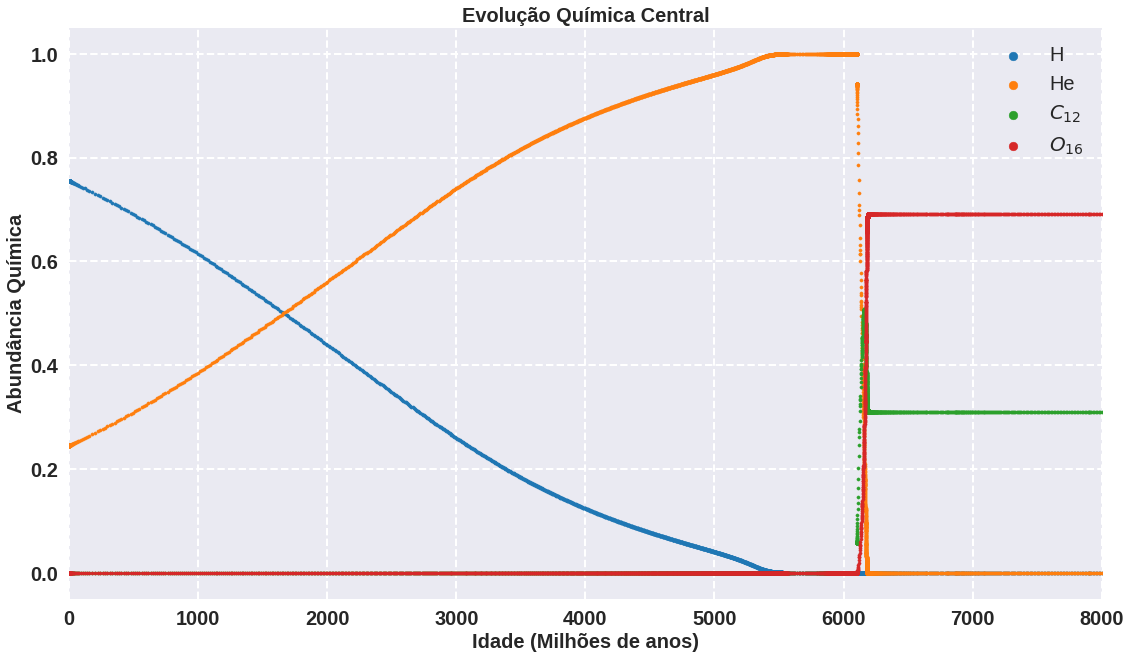

In [ ]:
#Plot do Flash de He e SubFlashes [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF2["log(age/Myr)"]),DF2["Log L"], s=10, marker=".", label="L")
mp.scatter(10**(DF2["log(age/Myr)"]),DF2["LHe"], s=10, marker=".", label="$L_{He}$")


#Configurações para o Plot 1:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Flash de He e SubFlashes", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6103.45, 6105)
mp.ylim(-0.5, 11)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("$log(L/L_{\odot})$", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/flash.pdf', format='png', dpi=600)
mp.show()

"""
minHe = DF_test.drop(DF_test[DF_test['Hecen'] < min].index)
FRH2 = minHe["log(age/Myr)"].max()
g = minHe['Hecen'].idxmin()
print(g)
g2 = minHe.loc[g]
g2
print(FRH2)
print(10**(FRH2))
"""





#Plot da abudância central de He [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["Hecen"], s=40, marker=".", label="He")
mp.scatter(10**(DF["log(age/Myr)"]),DF["O16cen"], s=40, marker=".", label="O16")
mp.scatter(10**(DF["log(age/Myr)"]),DF["C12cen"], s=40, marker=".", label="C12")


#Configurações para o Plot 2:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Tempo x Abundância Central", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6100, 6190)
#mp.ylim(-0.5, 11)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("Abundância central", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/HeCen.pdf', format='png', dpi=600)
mp.show()







#Plot da relação Luminosidade e Tempo [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["Log L"], s=10, marker=".", label="L", c="k")

#Configurações para o Plot 3:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Tempo x Luminosidade", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6191, 6192.45)
mp.ylim(2.8, 4)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("log L (L/$L_{\odot}$)", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/PT1.pdf', format='png', dpi=600)
mp.show()



#Plot da relação Luminosidade (He) e Tempo [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["LHe"], s=10, marker=".", label="$L_{He}$", c="k")


#Configurações para o Plot 4:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Tempo x Luminosidade (He)", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6191, 6192.45)
mp.ylim(0, 8.1)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("log LHe (LHe/$L_{\odot}$)", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/PT2.pdf', format='png', dpi=600)
mp.show()




#Plot da relação Luminosidade (H) e Tempo [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["Lcno"], s=10, marker=".", label="$L_{He}$", c="k")


#Configurações para o Plot 5:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Tempo x Luminosidade (H)", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6191, 6192.5)
mp.ylim(-35, 10)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("log LH (LH/$L_{\odot}$)", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/PT3.pdf', format='png', dpi=600)
mp.show()



#Curva de Resfriamento [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)

mp.scatter(10**(DF["log(age/Myr)"]),10**(DF["Log Teff"]), s=10, marker=".", label="$T_{eff}$")
#mp.scatter(10**(RGV["log(age/Myr)"]),10**(RGV["Log Teff"]), s=10, marker=".", label="$T_{eff} [RGV]$")
#mp.scatter(10**(RH["log(age/Myr)"]),10**(RH["Log Teff"]), s=10, marker=".", label="$T_{eff} [RH]$")
#mp.scatter(10**(RA["log(age/Myr)"]),10**(RA["Log Teff"]), s=10, marker=".", label="$T_{eff} [RA]$")
#mp.scatter(10**(PRA["log(age/Myr)"]),10**(PRA["Log Teff"]), s=10, marker=".", label="$T_{eff} [PRA]$")
#mp.scatter(10**(WD["log(age/Myr)"]),10**(WD["Log Teff"]), s=10, marker=".", label="$T_{eff} [WD]$")


#Configurações para o Plot 6:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
#lgnd.legendHandles[4]._sizes = [300]
mp.title("Curva de Resfriamento", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6192.45,6192.55)
#mp.ylim(-35, 10)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("$T_{eff}/K$", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/TeffPeak2.pdf', format='png', dpi=600)
mp.show()






#Evolução Química [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["Hcen"], s=40, marker=".", label="H")
mp.scatter(10**(DF["log(age/Myr)"]),DF["Hecen"], s=40, marker=".", label="He")
mp.scatter(10**(DF["log(age/Myr)"]),DF["C12cen"], s=40, marker=".", label="$C_{12}$")
mp.scatter(10**(DF["log(age/Myr)"]),DF["O16cen"], s=40, marker=".", label="$O_{16}$")




#Configurações para o Plot 7:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
lgnd.legendHandles[2]._sizes = [300]
lgnd.legendHandles[3]._sizes = [300]
mp.title("Evolução Química Central", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xticks(fontweight='bold', fontsize=20)
mp.xlim(0,8000)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("Abundância Química", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/ChemEVO2.pdf', format='pdf')#, dpi=600)
mp.show()






#Plot da abudância central de H [DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["Hcen"], s=40, marker=".", label="H")


#Configurações para o Plot 8:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Tempo x H Central", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(0, 6000)
#mp.ylim(-0.5, 11)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("Abundância de H central", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/HCen2.pdf', format='pdf', dpi=600)
mp.show()



#Plot da Massa durante os PT e inicio da WD[DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)
mp.scatter(10**(DF["log(age/Myr)"]),DF["Massa"], s=40, marker=".", label="Massa")
#mp.scatter(10**(PRA["log(age/Myr)"]),PRA["Massa"], s=40, marker=".", label="M no PRA")
#mp.scatter(10**(RA["log(age/Myr)"]),RA["Massa"], s=40, marker=".", label="M no RA")
#mp.scatter(10**(RH["log(age/Myr)"]),RH["Massa"], s=40, marker=".", label="M no RH")




#Configurações para o Plot 8:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Tempo x Massa", fontweight='bold', fontsize=20)
mp.xlabel("Idade (Milhões de anos)", fontweight='bold', fontsize=20)
mp.xlim(6192, 6193)
mp.ylim(0, 1.2)
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("Massa $(M/M_{\odot})$", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/Mass.png', format='pdf', dpi=600)
mp.show()


#Diagrama HR da WD[DADOS]
fig = mp.gcf()
fig.set_size_inches(18.5, 10.5)

mp.scatter(WD["Log Teff"],WD["Log L"], s=30, marker=".",  label="Anã Branca")
#mp.scatter(10**(PRA["log(age/Myr)"]),PRA["Massa"], s=40, marker=".", label="M no PRA")
#mp.scatter(10**(RA["log(age/Myr)"]),RA["Massa"], s=40, marker=".", label="M no RA")
#mp.scatter(10**(RH["log(age/Myr)"]),RH["Massa"], s=40, marker=".", label="M no RH")




#Configurações para o Plot 8:
lgnd =mp.legend(loc='best', fontsize=20)
lgnd.legendHandles[0]._sizes = [300]
#lgnd.legendHandles[1]._sizes = [300]
#lgnd.legendHandles[2]._sizes = [300]
#lgnd.legendHandles[3]._sizes = [300]
mp.title("Diagrama HR na etapa da Anã Branca", fontweight='bold', fontsize=20)
mp.xlabel("$log(T_{eff}/K)$", fontweight='bold', fontsize=20)
#mp.xlim(0, 8000)
#mp.ylim(0, 1.2)
mp.gca().invert_xaxis()
mp.xticks(fontweight='bold', fontsize=20)
mp.yticks(fontweight='bold', fontsize=20)
mp.grid(linestyle='--', linewidth=2)
mp.ylabel("log$(L/L_{\odot})$", fontweight='bold', fontsize=20)

mp.savefig('/content/drive/My Drive/UFRGS/2020 1/Astrofísica B/GraficosTrabFinal/HRWD.pdf', format='pdf')#, dpi=600)
mp.show()

